# Закономерности,определяющие успешность игры 

## Цель нашего исследования:

понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План:  

1.Открыть файл с данными и изучить общую информацию.  
2.Подготовить данные(изменить,заменить и т.д.)  
3.Провести исследовательский анализ данных.  
4.Составить портрет пользователя каждого региона.  
5.Проверить гипотезы.  
6.Сделать выводы.  

Шаг 1. Откроем  файл с данными и изучим общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

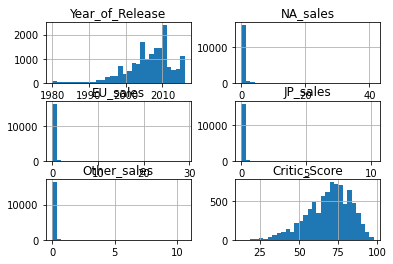

In [3]:
data.hist(bins =30)

Открыли и изучили общую информацию. На первых взгляд видно, что название столбцов в верхнем регистре. В некоторых столбцах нужно помени ть тип данных.

Шаг 2. Подготовим данные

Заменим название столбцов (приведем к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Проверим пропуски:

In [6]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Есть пропуски в столбцах critic_score и user_score. В столбце user_score есть 'tbd'означает «подлежит определению». Заменим на nan. Изменим тип данных столбца user_score на float.Значения пропущены по причине того,что либо данные искажены,либо не было такой функции как 'рейтинг'. Данные оставим неизменными.

In [7]:
import numpy as np
print(data['critic_score'].unique())
print(data['user_score'].unique())
data['user_score'] = data['user_score'].replace(['tbd'],np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float')

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В столбце rating пропущенные значения оставим неизменными.Так как их невозможно заменить.

In [8]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В столбце year_of_release данные пропущены так как нет данных в каком году вышла игра,либо просто не указали. Также, возможно,что данные искаженны. Проверим нет ли одной игры на разных платформах,что может помочь найти год релиза. Изменим тип данных на Int.

In [9]:
import warnings
warnings.filterwarnings("ignore")
print(data['year_of_release'].unique())
for i in data[data['year_of_release'].isnull()==True].index:
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i],'year_of_release'].max()
    
data['year_of_release'] = data['year_of_release'].astype('Int64')

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


В столбцах name и genre. Пропущенных данных мало. Поэтому можем спокойно их удалить.

In [10]:
data.dropna(subset = ['name'], inplace=True)
data.dropna(subset = ['genre'], inplace=True)

Поверим все ли пропуски обработали.

In [11]:
print(data.isnull().sum())

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Уменьшили количество пропущенных строк в столбце year_of_release

Проверим на неявные дубликаты. Для этого посмотрим уникальные значения в столбцах с названием игры и платформы.

In [12]:
print(data['name'].unique())
print(data['platform'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Неявных дубликатов нет. Проверим на явные дубликаты.

In [13]:
print(data[data.duplicated (keep='last')])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Явных дубликатов тоже нет.

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] +data['other_sales']

Подготовили данные. Там где могли изменили тип данных и данные, в некоторых местах данные оставили неизменными. Явных и неявных дубликатов нет. Посчитали суммарные продажи. 

In [15]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

In [16]:
print(data['rating'].unique())
print(data.loc[data['rating'].isna()])

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulati

Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

<AxesSubplot:title={'center':'count_year'}, xlabel='year_of_release', ylabel='count'>

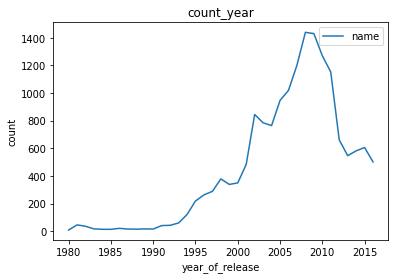

In [17]:
count_year = data.pivot_table(index = 'year_of_release',values = 'name',aggfunc = 'count')
count_year.plot(title = 'count_year',ylabel = 'count')

На графике видно,что с 1980 по 1990 игры были неочень популярны,это связано с тем,что не у всех была техника,на которой можно играть. Но начиная с 1990 по 2008,это можно объяснить с развитием компьютеров.Дальше виден резкий спад,скорее всего связано с появлением мобильных телефонов и предпочтением мобильных игр.

Посмотрим, как менялись продажи по платформам. 

<AxesSubplot:title={'center':'platform_sum'}, xlabel='platform', ylabel='sum'>

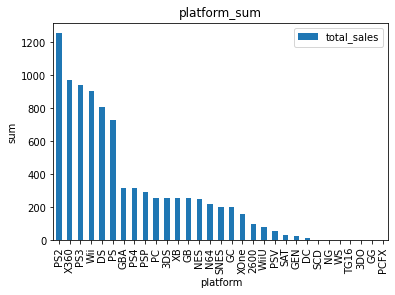

In [18]:
platform_sum = data.pivot_table(index = 'platform',values = 'total_sales',aggfunc = 'sum').sort_values(by='total_sales',ascending = False)
platform_sum.plot(kind = 'bar',title = 'platform_sum',ylabel = 'sum')

 На графике видно,что самые популярные платформы P52,X360,P53,WIii,DS и PS. Построим распределение по годам.

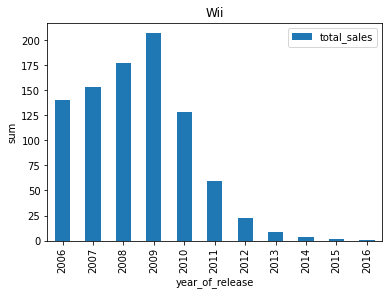

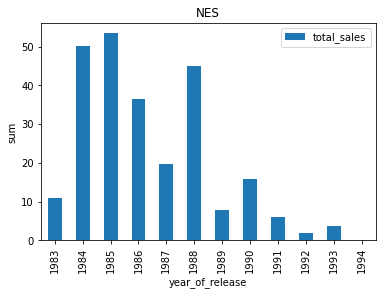

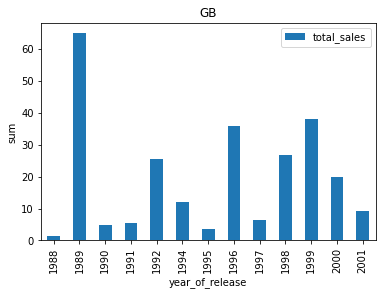

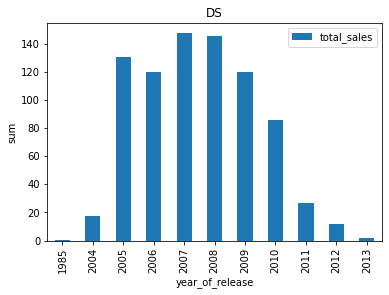

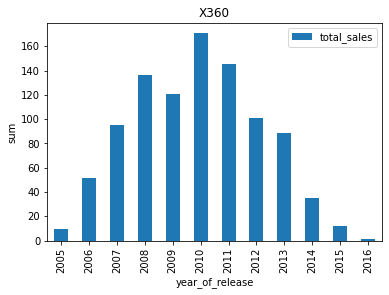

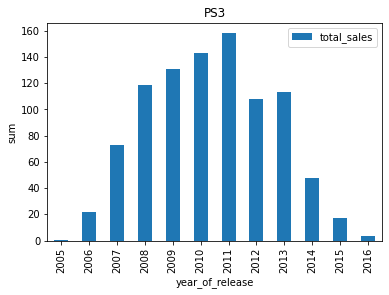

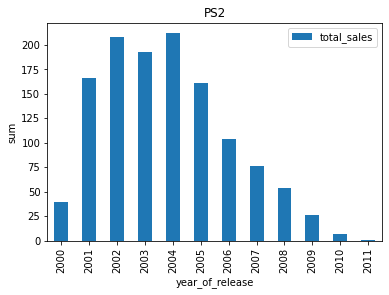

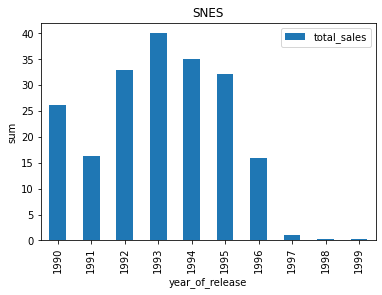

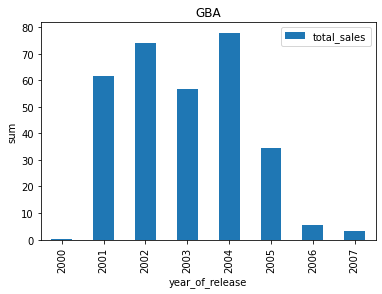

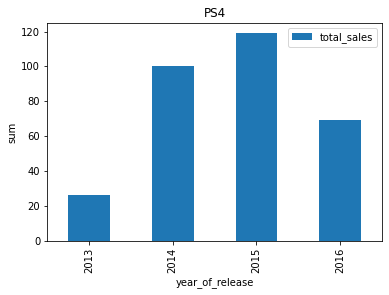

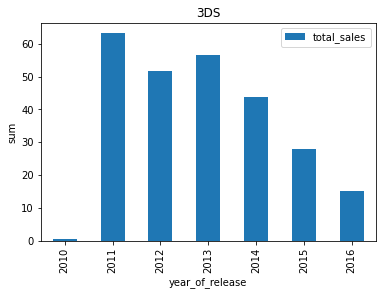

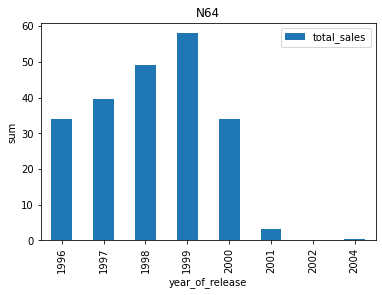

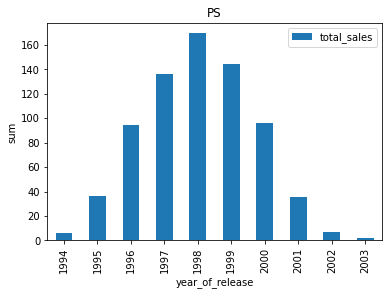

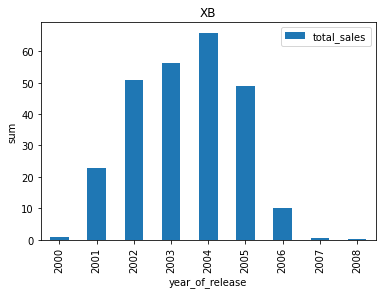

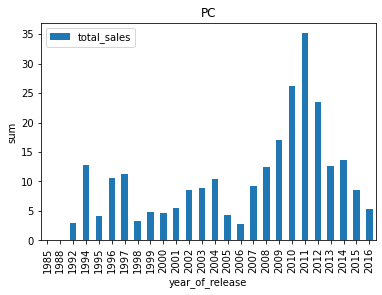

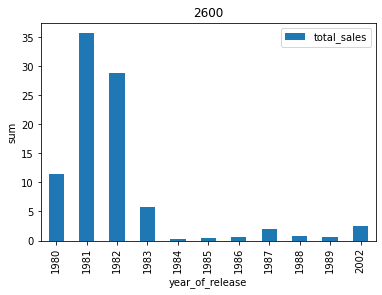

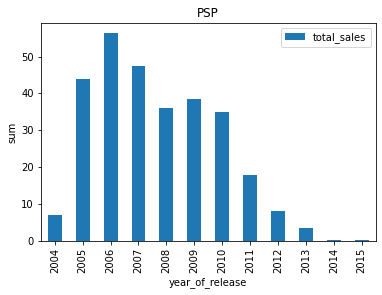

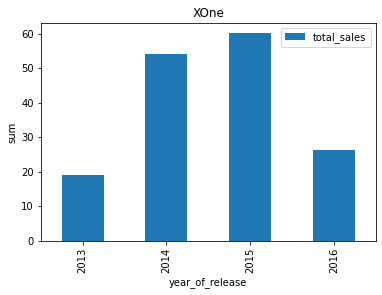

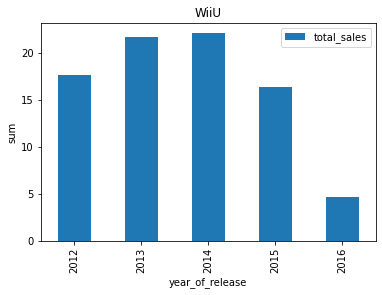

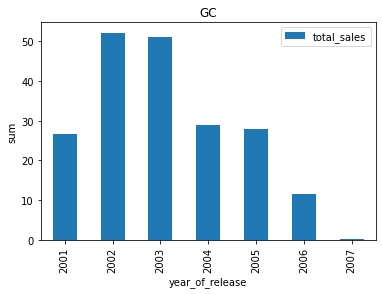

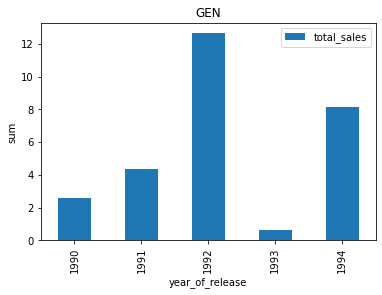

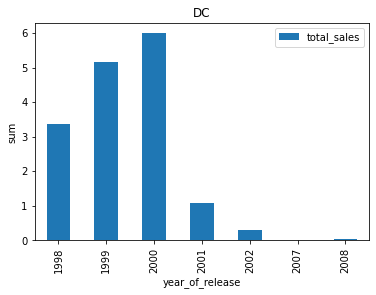

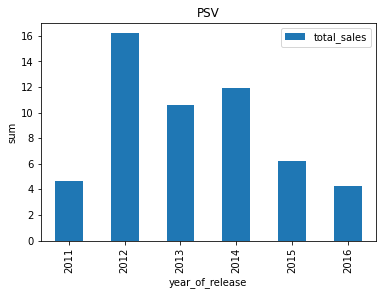

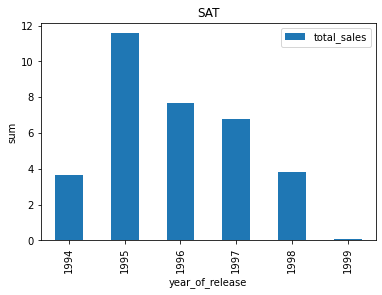

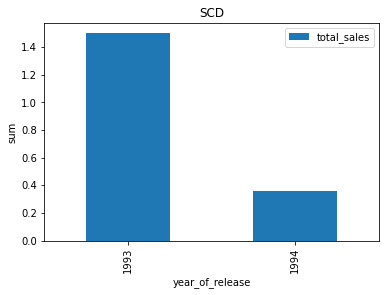

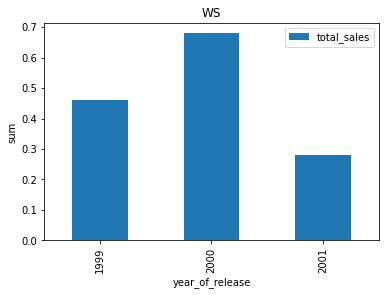

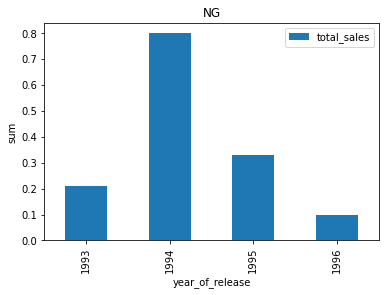

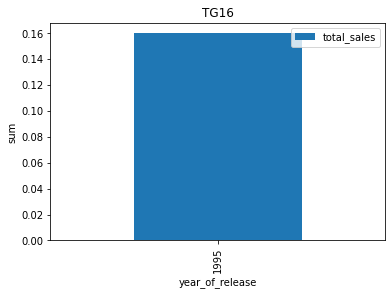

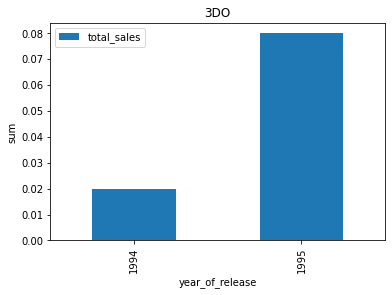

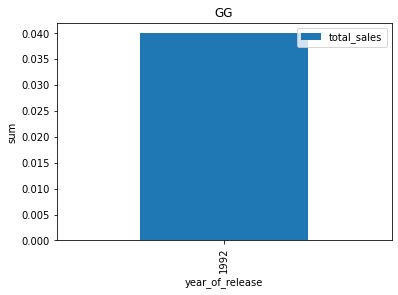

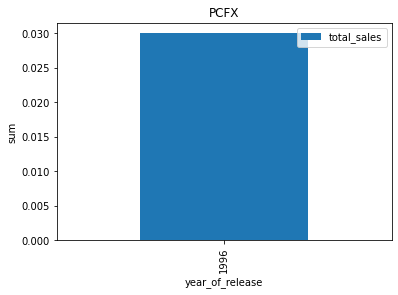

In [19]:
platforms = data['platform'].unique()
for i in platforms:
    data[data['platform'] == i].pivot_table(index = 'year_of_release',values = 'total_sales',aggfunc ='sum').plot(kind ='bar',ylabel ='sum',title = i)

 В среднем за каждые 4 года  появляются новые платформы  и исчезают старые платформы в среднем за 8-10 лет.

Посчитаем актуальный период. Мы вяснили,что самый пик игр был с 1990 по 2008,но не все эти платформы остались в 2016 году,то справедливо взять даты начиная выше 2011.

In [20]:
new_data = data[data['year_of_release']>2011].reset_index(drop=True)
print(new_data)

                               name platform  year_of_release         genre  \
0                Grand Theft Auto V      PS3             2013        Action   
1                Grand Theft Auto V     X360             2013        Action   
2         Call of Duty: Black Ops 3      PS4             2015       Shooter   
3               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
4        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                             ...      ...              ...           ...   
2894               Strawberry Nauts      PSV             2016     Adventure   
2895               Aiyoku no Eustia      PSV             2014          Misc   
2896  Samurai Warriors: Sanada Maru      PS3             2016        Action   
2897        Haitaka no Psychedelica      PSV             2016     Adventure   
2898            Winning Post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  other_sales  cr

In [21]:
# Комментарий ревьюера
new_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2894,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2895,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2896,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2897,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Выберем несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='platform', ylabel='sum'>

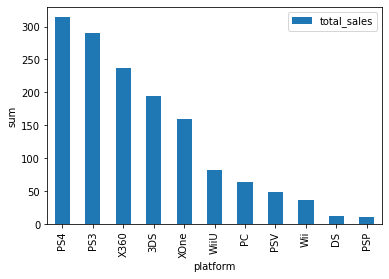

In [22]:
the_best_platforms = new_data.pivot_table(index ='platform',values = 'total_sales',aggfunc = 'sum').sort_values(by = 'total_sales',ascending =False)
the_best_platforms.plot(kind ='bar',ylabel ='sum')

На графике видны попуярные платформы.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Посмотрим среднее значение и «усами» увидим максимальные отклонения от него на всех платформах.

In [23]:
print(the_best_platforms)

          total_sales
platform             
PS4            314.14
PS3            289.71
X360           237.52
3DS            195.01
XOne           159.32
WiiU            82.19
PC              63.51
PSV             49.18
Wii             36.60
DS              13.21
PSP             11.69


(0.0, 2.0)

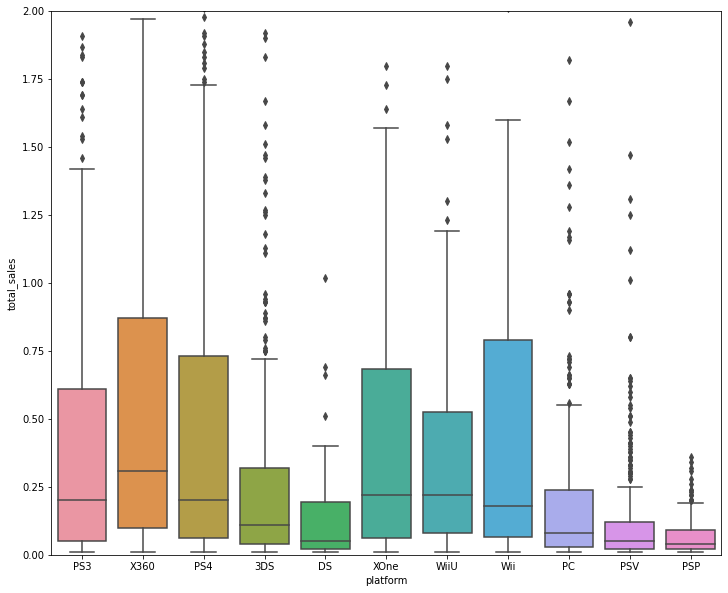

In [24]:
platformss = new_data
#print(np.sort(platformss['total_sales'].unique()))
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
seaborn.boxplot(data = platformss,x = 'platform',y ='total_sales')
plt.ylim(0,2)

In [25]:
platformss.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,397.0,0.491209,1.385416,0.01,0.040,0.11,0.320,14.60
DS,32.0,0.412812,1.416559,0.01,0.020,0.05,0.195,8.06
PC,255.0,0.249059,0.490149,0.01,0.030,0.08,0.240,5.14
PS3,494.0,0.586457,1.461448,0.01,0.050,0.20,0.610,21.05
PS4,392.0,0.801378,1.609456,0.01,0.060,0.20,0.730,14.63
PSP,175.0,0.066800,0.073594,0.01,0.020,0.04,0.090,0.36
PSV,411.0,0.119659,0.203011,0.01,0.020,0.05,0.120,1.96
Wii,55.0,0.665455,1.157206,0.01,0.065,0.18,0.790,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.080,0.22,0.525,7.09


Больше всех продаж у платформы PS3. Менеьше всего у DS. Средние значения на платформах проходят у всех по рахному.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Рассмотрим платформу PS3. Посчитаем корреляцию между отзывами пользователей и продажами.

In [26]:
new_data[new_data['platform'] == 'PS3']['total_sales'].corr(new_data[new_data['platform'] == 'PS3']['user_score'])

-0.005043048088258108

Значение корреляции находится далеко от 1,это означает связи между продажами и отзывами пользователей нет. Построим диаграмму рассеяния

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

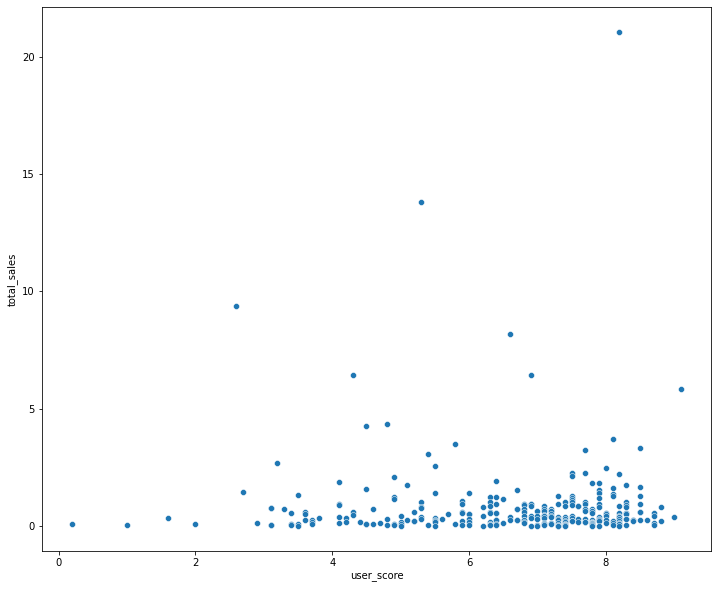

In [27]:
plt.figure(figsize=(12,10))
seaborn.scatterplot(data = new_data[new_data['platform'] == 'PS3'],x = 'user_score', y ='total_sales' )

Посчитаем корреляцию между отзывами критиков и продажами.

In [28]:
new_data[new_data['platform'] == 'PS3']['total_sales'].corr(new_data[new_data['platform'] == 'PS3']['critic_score'])

0.3313706318754622

Значение корреляции положительное, но не близко к 1. Э то значит связь есть,но слабая. Построим диаграмму рассеяния.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

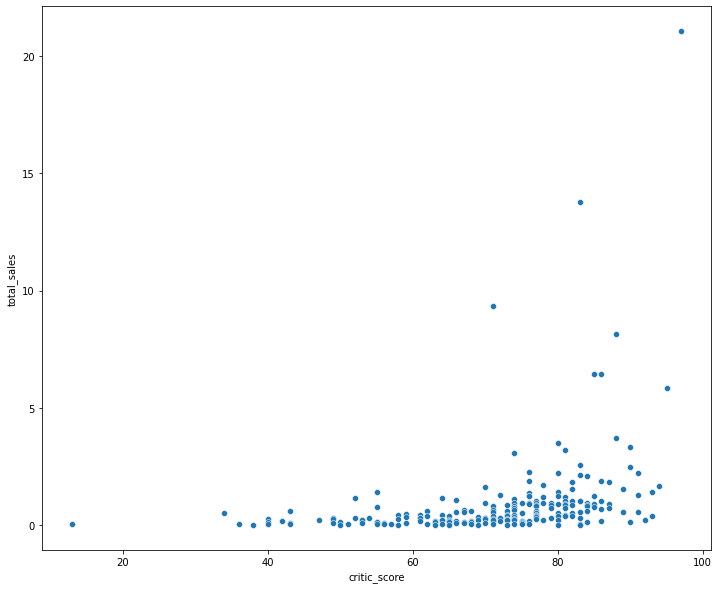

In [29]:
plt.figure(figsize=(12,10))
seaborn.scatterplot(data = new_data[new_data['platform'] == 'PS3'],x = 'critic_score', y ='total_sales' )

Соотнесем выводы с продажами игр на других платформах.

In [30]:
platforms = ['X360','Wii','PS4','3DS']
for i in platforms:
    print(i)
    korr_user = new_data[new_data['platform'] == i]['total_sales'].corr(new_data[new_data['platform'] == i]['user_score'])
    korr_critic = new_data[new_data['platform'] == i]['total_sales'].corr(new_data[new_data['platform'] == i]['critic_score'])
    def korr(korr):
        korr = abs(korr)
        if 0<korr<=0.2:
            return 'очень слабая'
        elif 0.2<korr<=0.5:
            return 'слабая'
        elif 0.5<korr<=0.7:
            return 'средняя'
        elif 0.7<korr<=0.9:
            return 'сильная'
        elif 0.9<korr<=1:
            return 'очень сильная'
        else:
            return 'не выявлена'
    print('корреляцию между отзывами пользователей и продажами',korr(korr_user),korr_user)
    print('корреляцию между отзывами критиков и продажами',korr(korr_critic),korr_critic)
    print('')

X360
корреляцию между отзывами пользователей и продажами очень слабая 0.006314938203566999
корреляцию между отзывами критиков и продажами слабая 0.3602659026138049

Wii
корреляцию между отзывами пользователей и продажами слабая 0.2775423925955098
корреляцию между отзывами критиков и продажами слабая -0.4059967406465306

PS4
корреляцию между отзывами пользователей и продажами очень слабая -0.031957110204556376
корреляцию между отзывами критиков и продажами слабая 0.406567902061781

3DS
корреляцию между отзывами пользователей и продажами очень слабая 0.19814963960883375
корреляцию между отзывами критиков и продажами слабая 0.32045778764077804



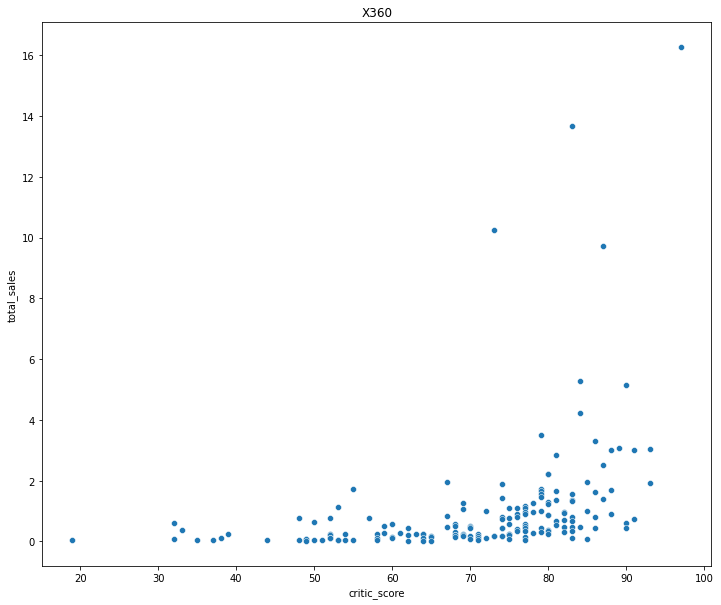

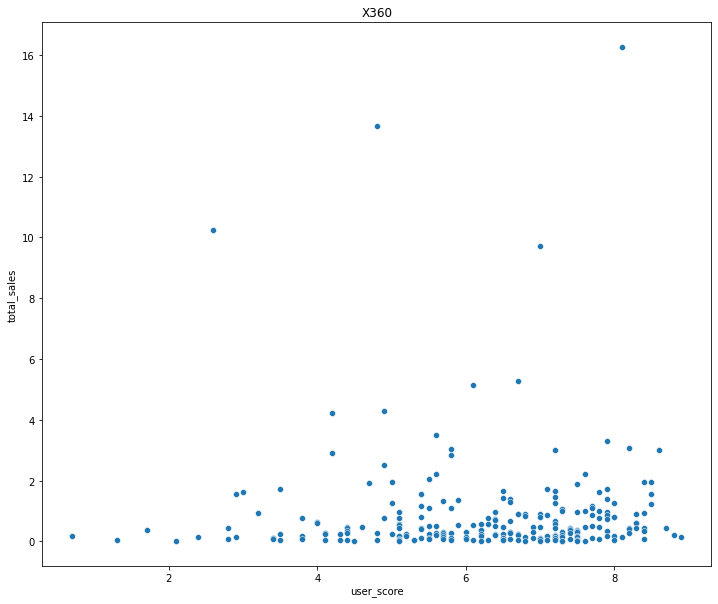

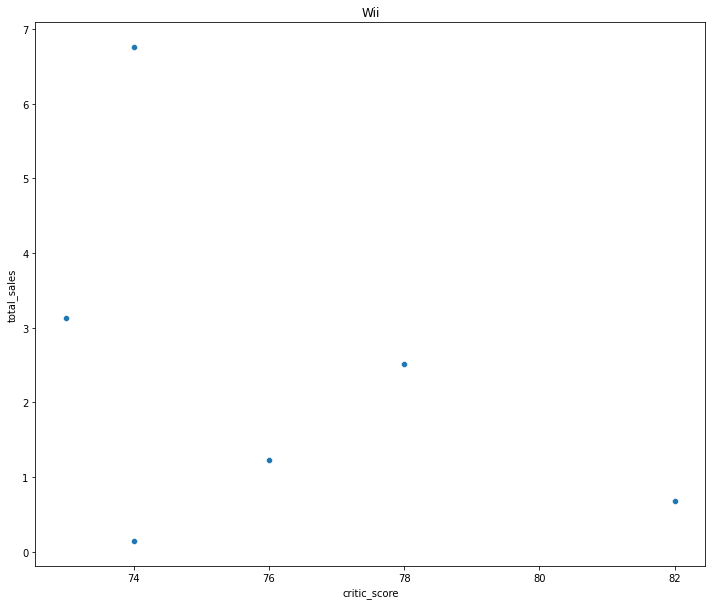

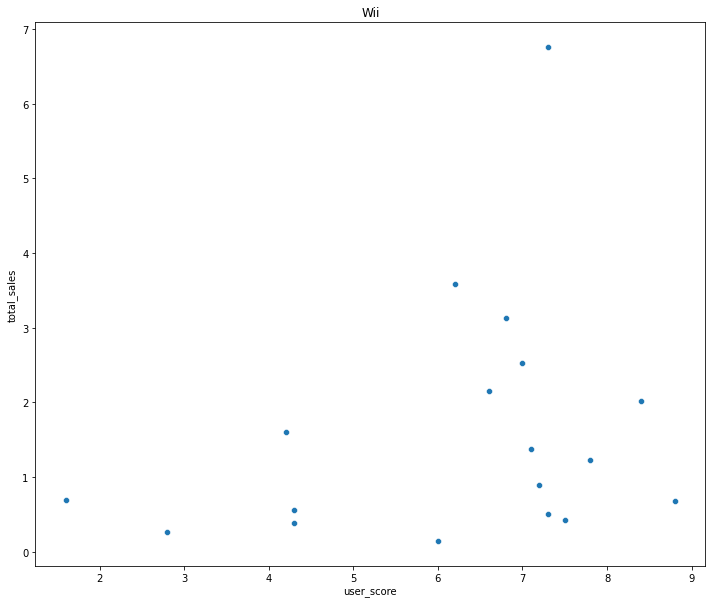

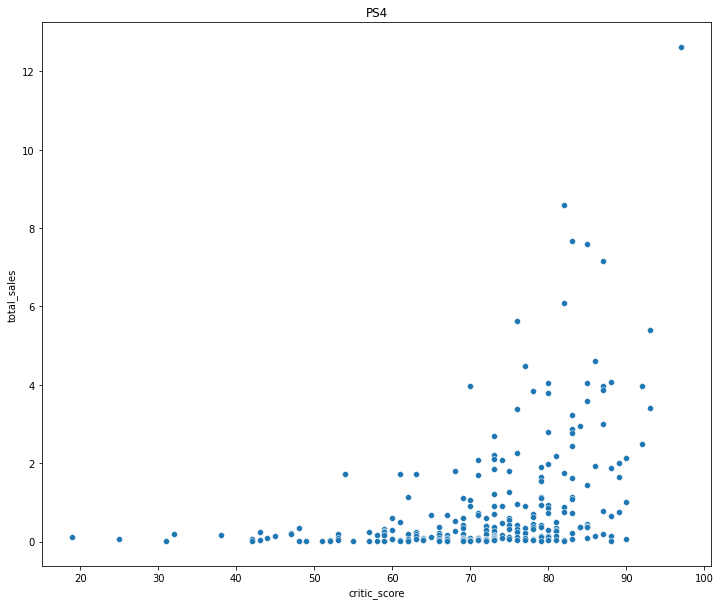

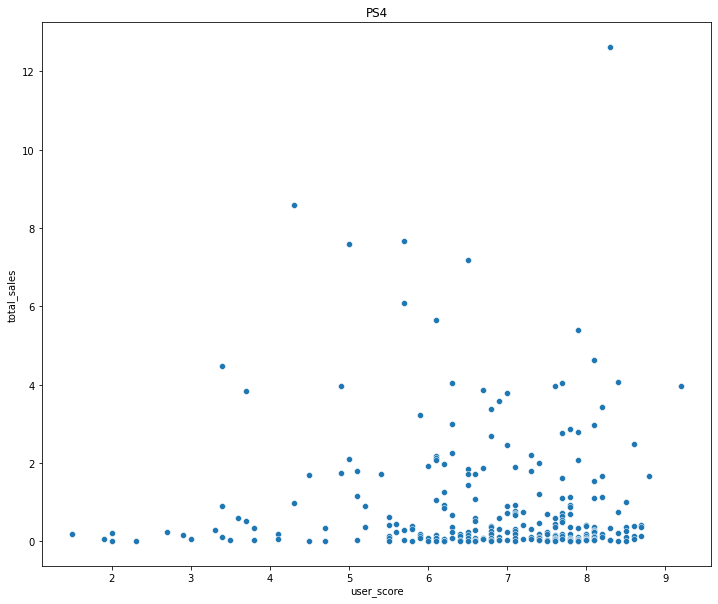

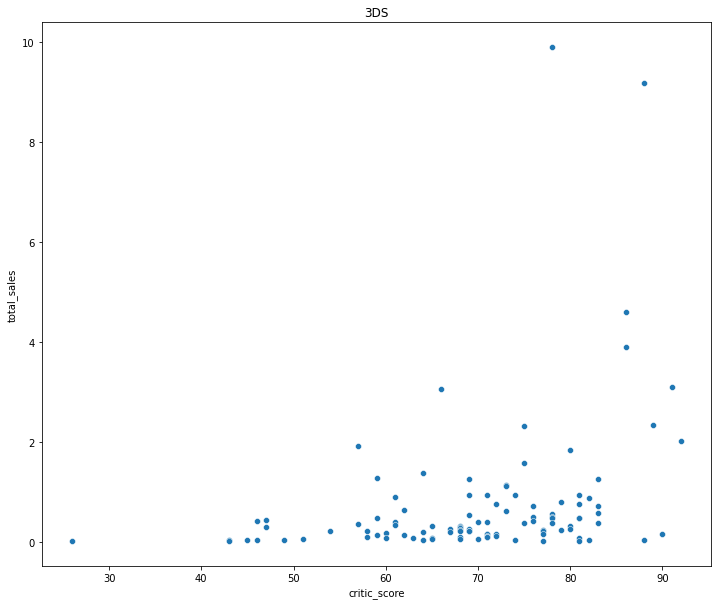

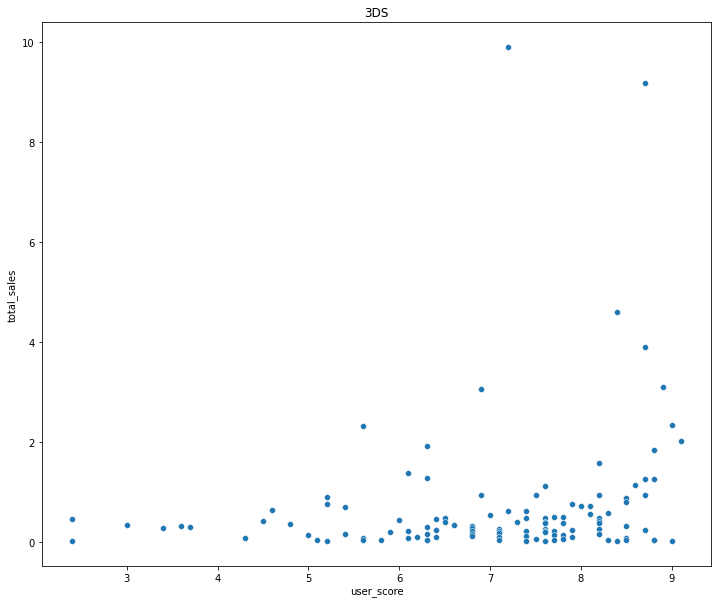

In [31]:
for i in platforms:
    plt.figure(figsize=(12,10))
    seaborn.scatterplot(data = new_data[new_data['platform'] == i],x = 'critic_score', y ='total_sales' )
    plt.title(i)
    plt.figure(figsize=(12,10))
    seaborn.scatterplot(data = new_data[new_data['platform'] == i],x = 'user_score', y ='total_sales' )
    plt.title(i)

Между отзывами критиков и продажами на платформах X360,Wii,PS4,3DS есть связь,но слабая. А вот между отзывами пользователей и продажами связь очень слабая.



<font color='Black'> Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
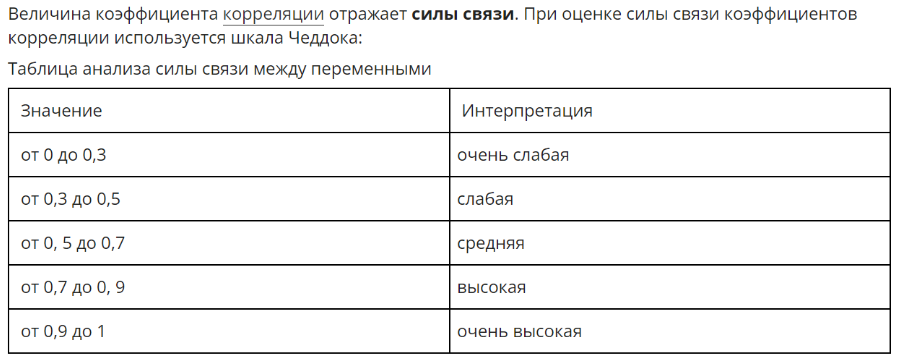

Посмотрим на общее распределение игр по жанрам. 

In [32]:
print(new_data.pivot_table(index='genre',values = 'total_sales',aggfunc ='sum').sort_values(by='total_sales',ascending =False))

              total_sales
genre                    
Action             446.41
Shooter            304.75
Role-Playing       192.80
Sports             181.07
Misc                85.28
Platform            61.00
Racing              53.50
Fighting            44.49
Simulation          35.12
Adventure           29.43
Strategy            13.34
Puzzle               4.89


<AxesSubplot:xlabel='genre'>

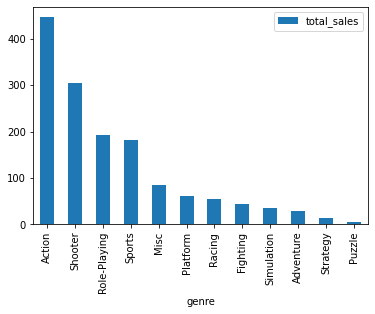

In [33]:
new_data.pivot_table(index='genre',values = 'total_sales',aggfunc ='sum').sort_values(by='total_sales',ascending =False).plot(kind ='bar')

максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.Поэтому сравним мединные продажи.

              total_sales
genre                    
Shooter             0.430
Sports              0.240
Platform            0.210
Role-Playing        0.140
Racing              0.140
Fighting            0.130
Action              0.120
Misc                0.120
Simulation          0.120
Strategy            0.080
Puzzle              0.045
Adventure           0.030


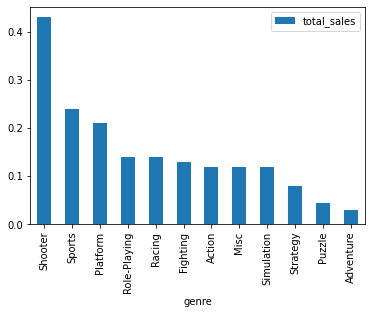

In [34]:
median_sales = new_data.pivot_table(index='genre',values = 'total_sales',aggfunc ='median').sort_values(by='total_sales',ascending =False)
median_sales.plot(kind ='bar')
print(median_sales)


(0.0, 1.8)

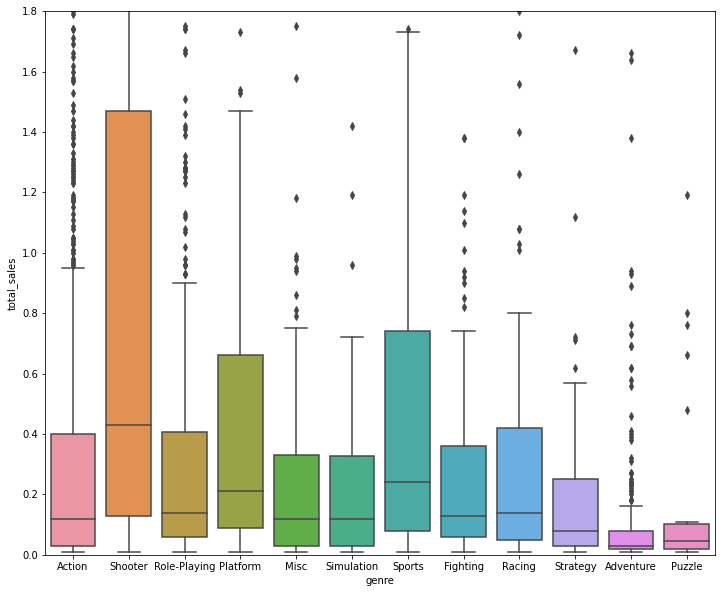

In [35]:
plt.figure(figsize=(12,10))
seaborn.boxplot(data = new_data,x = 'genre',y ='total_sales')
plt.ylim(0,1.8)

С 1980 по 1990 игры были неочень популярны,это связано с тем,что не у всех была техника,на которой можно играть. Но начиная с 1990 по 2008,это можно объяснить с развитием компьютеров. Дальше виден резкий спад,скорее всего связано с появлением мобильных телефонов и предпочтением мобильных игр. Взяты данные начиная с 2012 года. В среднем за каждые 4 года появляются новые платформы и исчезают старые платформы в среднем за 8-10 лет. Взять даты начиная выше 2008. Самые популярные платформы P52,X360,P53,WIii,DS и PS.Прибыльными стабильными жанрами являются Shooter,Sports и Platform. Между отзывами критиков и продажами на платформах X360,Wii,PS4,3DS есть связь,но слабая. А вот между отзывами пользователей и продажами связь очень слабая.

Шаг 4. Составим портрет пользователя каждого региона. Найдем самые популярные платформы,жанры и рейтинги в разных регионах.

Посмотрев в инете, что из себя представляет рейтинг ESRB, то оказалось, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных. Для этого поставим заглушку и заменим на 'игра для др стран'.

In [36]:
new_data['rating'] = new_data['rating'].fillna('игра для др стран')

In [37]:
for i in ['na_sales','eu_sales','jp_sales']:
    print(new_data.pivot_table(index='platform',values=i,aggfunc='sum').sort_values(by =i,ascending =False).head(5))
    print(new_data.pivot_table(index='genre',values=i,aggfunc='sum').sort_values(by =i,ascending =False).head(5))
    print(new_data.pivot_table(index='rating',values=i,aggfunc='sum').sort_values(by =i,ascending =False).head(5))

          na_sales
platform          
X360        140.57
PS4         108.74
PS3         103.74
XOne         93.12
3DS          55.49
              na_sales
genre                 
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
                   na_sales
rating                     
M                    231.67
E                    114.37
игра для др стран    103.31
E10+                  77.93
T                     66.02
          eu_sales
platform          
PS4         141.09
PS3         107.27
X360         74.89
XOne         51.59
3DS          42.83
              eu_sales
genre                 
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
                   eu_sales
rating                     
M                    194.44
E                    113.03
игра для др стран     91.50
E10+                  57.25
T                     52.96
          jp_sales
p

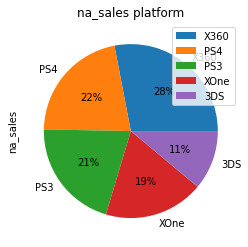

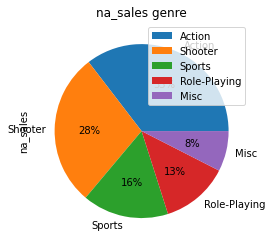

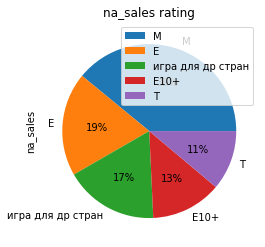

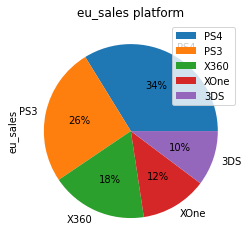

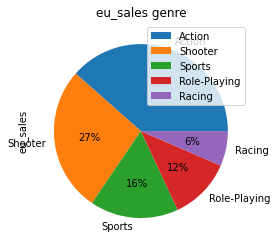

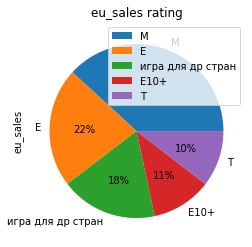

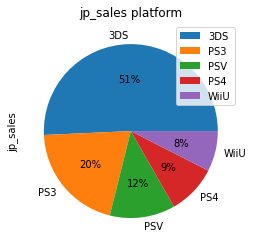

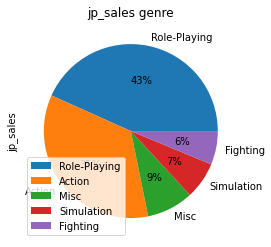

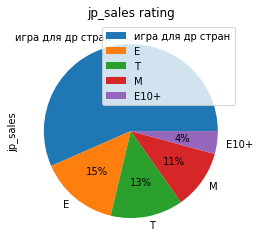

In [38]:
for i in ['na_sales','eu_sales','jp_sales']:
    new_data.groupby(['platform']).sum().sort_values(by =i,ascending =False).head(5).plot(kind='pie', y= i, autopct='%1.0f%%',title =i+' platform')
    new_data.groupby(['genre']).sum().sort_values(by =i,ascending =False).head(5).plot(kind='pie', y= i, autopct='%1.0f%%',title =i+' genre')
    new_data.groupby(['rating']).sum().sort_values(by =i,ascending =False).head(5).plot(kind='pie', y= i, autopct='%1.0f%%',title =i+' rating')

Самыми популярными платформами в Северной Америке X360,PS3,Xone,3DS,PS4 жанры:Action,Shooter,Sports,Misc,Role-Playing;рейтинги:M,E,T,E10+,игра для др стран. В Европе платформы:PS3,X360,PS4,Xone,3DS;жанры:Action,Shooter,Sports,Racing,Role-Playing;рейтинги:M,E,T,E10+,игра для др стран.В Японии платформы:3DS,PS3,PS4,PSV,WiiU;жанры:Role-Playing,Action,Misc,Simulation,Fighting;рейтинги:E,T,M,E10+,игра для др стран.Разница в жанре в культуре страны в Японии больше любят игры для р стран,в Европе и СА больше Action.

Шаг 5. Проверим гипотезы.

In [40]:
new_data.groupby(['platform'])['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,115.0,7.028696,1.476587,2.4,6.300,7.40,8.200,9.1
DS,3.0,7.000000,1.907878,4.8,6.400,8.00,8.100,8.2
PC,211.0,6.445498,1.657455,1.4,5.500,6.80,7.700,9.3
PS3,284.0,6.539085,1.648874,0.2,5.500,7.00,7.800,9.1
PS4,257.0,6.748249,1.459481,1.5,6.100,7.00,7.800,9.2
PSP,4.0,5.950000,3.070831,3.2,3.350,5.85,8.450,8.9
PSV,130.0,7.410000,1.363582,1.8,7.025,7.75,8.300,9.3
Wii,18.0,6.177778,1.958558,1.6,4.725,6.90,7.300,8.8
WiiU,100.0,6.904000,1.435405,2.7,6.200,7.10,7.925,9.1


Средние пользовательские рейтинги платформ Xbox One и PC кажутся одинаковыми. Проверим. Сравним средние двух совокупностей.

Сформулируем гипотезу.

H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
H1:Средние пользовательские рейтинги платформ Xbox One и PC разные;
Возьмем alpha =0.01.

Критерий хначимости alpha =0.01. Не будем учитывать игры с пустым рейтингом.

Возьмем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

In [42]:
print(new_data['platform'].unique())

['PS3' 'X360' 'PS4' '3DS' 'DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'PSP']


In [43]:
from scipy import stats as st
import numpy as np

sample_1 = new_data[new_data['platform']=='XOne']['user_score'].dropna()

sample_2 = new_data[new_data['platform']=='PC']['user_score'].dropna()

alpha =0.01

results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


In [44]:
new_data.groupby(['genre'])['user_score'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,531.0,6.834275,1.371830,1.6,6.250,7.20,7.800,9.1
Adventure,72.0,7.466667,1.277652,2.9,6.950,7.55,8.400,9.3
Fighting,70.0,6.895714,1.431269,2.1,6.300,7.40,7.800,8.7
Misc,67.0,6.938806,1.257939,2.4,6.250,7.00,7.850,8.7
Platform,66.0,6.806061,1.654447,2.9,5.500,7.20,8.200,9.0
Puzzle,9.0,7.633333,0.888819,6.2,7.400,7.90,8.400,8.6
Racing,86.0,6.151163,1.667597,1.0,5.300,6.30,7.400,9.1
Role-Playing,171.0,7.258480,1.278637,1.4,6.600,7.50,8.150,9.3
Shooter,196.0,6.437245,1.433622,2.6,5.575,6.70,7.600,8.9


видно,что средние пользовательские рейтинги жанров Action больше, чем у Sports. Сформирулируем гипотезу. За нулевую гипотезу возьмем средние пользовательские рейтинги одинаковые.

H0:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Критерий хначимости alpha =0.01. Не будем учитывать игры с пустым рейтингом.

Возьмем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

In [45]:
from scipy import stats as st
import numpy as np

sample_1 = new_data[new_data['genre']=='Action']['user_score'].dropna()

sample_2 = new_data[new_data['genre']=='Sports']['user_score'].dropna()

alpha =0.01
results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


Был использован метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Вывод:

Открыли и изучили данные. 
Удалили пустые значения,где могли. 
Изменили тип данных в столбцах.
С 1980 по 1990 игры были неочень популярны,это связано с тем,что не у всех была техника,на которой можно играть. Но начиная с 1990 по 2008,это можно объяснить с развитием компьютеров.Дальше виден резкий спад,скорее всего связано с появлением мобильных телефонов и предпочтением мобильных игр. 
В среднем за каждые 4 года появляются новые платформы и исчезают старые платформы в среднем за 8-10 лет. Взять даты начиная выше 2008. 
Самые популярные платформы P52,X360,P53,WIii,DS и PS. 
Прибыльными стабильными жанрами являются Shooter,Sports и Platform. 
Между отзывами критиков и продажами на платформах X360,Wii,PS4,3DS есть связь,но слабая. А вот между отзывами пользователей и продажами связь очень слабая.
- Самыми популярными платформами в Северной Америке X360,PS3,Xone,3DS,PS4 
жанры:Action,Shooter,Sports,Misc,Role-Playing;рейтинги:M,E,T,E10+,игра для др стран. 
- В Европе платформы:PS3,X360,PS4,Xone,3DS;жанры:Action,Shooter,Sports,Racing,Role-Playing;рейтинги:M,E,T,E10+,игра для др стран.
- В Японии платформы:3DS,PS3,PS4,PSV,WiiU;жанры:Role-Playing,Action,Misc,Simulation,Fighting;рейтинги:E,T,M,E10+,игра для др стран.
Разница в жанре в культуре страны в Японии больше любят игры для р стран,в Европе и СА больше Action.

С помощью  метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Таким образом, потратить рекламный бюдет нужно на платформы 3DS,Xone и PS4, на жанры Shooter,Sports и Platform, и ориентироваться на подростков с 17 лет, татк как они больше всех играют в компьютерные игры.